In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts


In [2]:
df = pd.read_excel('Oil well.xlsx',index_col = 0)

In [3]:
df.head(2)

,\nOil volume (m3/day),Volume of liquid (m3/day),\nGas volume (m3/day),Water volume (m3/day),Water cut (%),\nWorking hours,\nDynamic level (m),\nReservoir pressure (atm)
Date,,,,,,,,
2013-01-01,49,70,13055,21,29,24,1819,214
2013-01-02,49,70,13055,21,29,24,1836,214


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
\nOil volume (m3/day),2939.0,17.624362,9.689026,0.0,11.0,15.0,22.0,49.0
Volume of liquid (m3/day),2939.0,59.464103,18.634101,12.0,50.0,58.0,74.0,113.0
\nGas volume (m3/day),2939.0,4730.146308,2598.888524,4.0,3041.5,3909.0,5843.5,13113.0
Water volume (m3/day),2939.0,41.828853,13.056625,9.0,33.0,43.0,50.0,99.0
Water cut (%),2939.0,70.694794,9.534203,29.0,69.0,73.0,76.0,100.0
\nWorking hours,2939.0,22.344675,3.039553,7.0,22.0,24.0,24.0,24.0
\nDynamic level (m),2939.0,1930.383464,114.543752,1529.0,1855.0,1890.0,2008.0,2137.0
\nReservoir pressure (atm),2939.0,157.019054,32.917150,100.0,129.0,157.0,185.5,214.0


In [5]:
#     df['\nOil volume (m3/day)']
#     df['Volume of liquid (m3/day)']
#     df['\nGas volume (m3/day)']
#     df['Water volume (m3/day)']
#     df['water cut (%)']
#     df['\nWorking hours']
#     df['\nDynamic level (m)']
#     df['\nReservoir pressure (atm)']  

In [6]:
df['water cut (%)'] = df.iloc[:,4]

In [7]:
df.columns

Index(['\nOil volume (m3/day)', 'Volume of liquid (m3/day)',
       '\nGas volume (m3/day)', 'Water volume (m3/day)', 'Water cut (%) ',
       '\nWorking hours', '\nDynamic level (m)', '\nReservoir pressure (atm)',
       'water cut (%)'],
      dtype='object')

In [8]:
df.drop(df.columns[4],axis = 1,inplace = True)

In [9]:
df.head()

,\nOil volume (m3/day),Volume of liquid (m3/day),\nGas volume (m3/day),Water volume (m3/day),\nWorking hours,\nDynamic level (m),\nReservoir pressure (atm),water cut (%)
Date,,,,,,,,
2013-01-01,49,70,13055,21,24,1819,214,29
2013-01-02,49,70,13055,21,24,1836,214,29
2013-01-03,49,70,13055,21,24,1788,214,29
2013-01-04,49,70,13055,21,24,1789,214,29
2013-01-05,44,70,11768,26,24,1825,214,36


<AxesSubplot:xlabel='Date'>

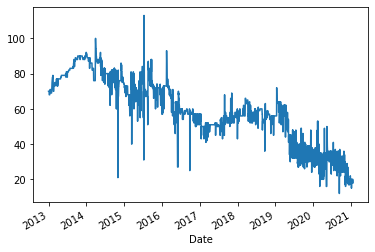

In [10]:
df['Volume of liquid (m3/day)'].plot()

<AxesSubplot:xlabel='Date'>

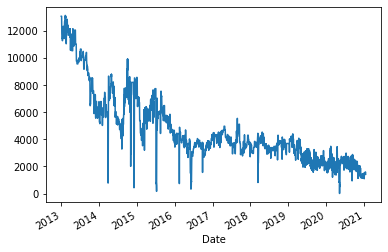

In [11]:
df['\nGas volume (m3/day)'].plot()

In [12]:
df['GLR'] = df['\nGas volume (m3/day)'] /  df['Volume of liquid (m3/day)']

<AxesSubplot:xlabel='Date'>

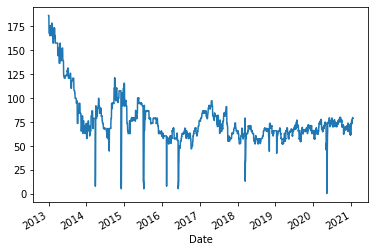

In [13]:
df['GLR'].plot()

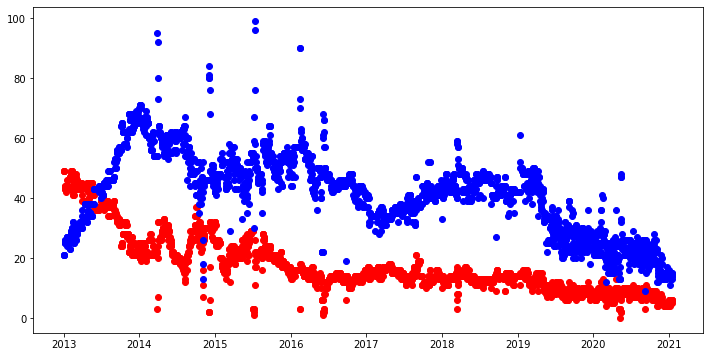

In [14]:
plt.figure(figsize = (12,6))

plt.scatter(df.index,df['\nOil volume (m3/day)'],c = 'red')
plt.scatter(df.index,df['Water volume (m3/day)'],c = 'blue')



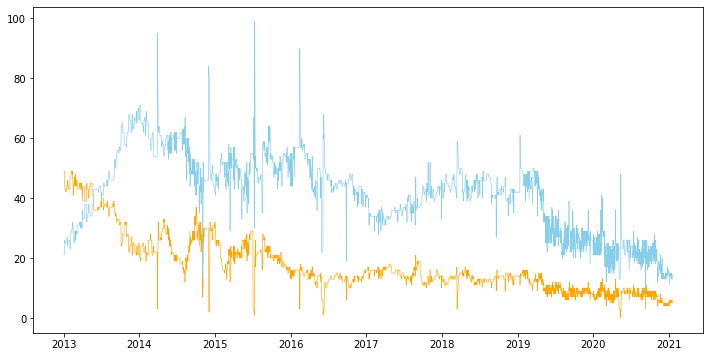

In [15]:
plt.figure(figsize = (12,6))


plt.plot(df.index,df['\nOil volume (m3/day)'], color = 'orange',linewidth = 0.6)
plt.plot(df.index,df['Water volume (m3/day)'], color = 'skyblue',linewidth = 0.6)

In [16]:
X = df.iloc[:,[0,2,3]]

In [17]:
y = df['\nReservoir pressure (atm)']

In [39]:
X_train, X_test, y_train, y_test = df.iloc[:2000,[1,2]],  df.iloc[2000:,[1,2]],  df['\nReservoir pressure (atm)'][:2000], df['\nReservoir pressure (atm)'][2000:]

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
yp_train = model.predict(X_train)

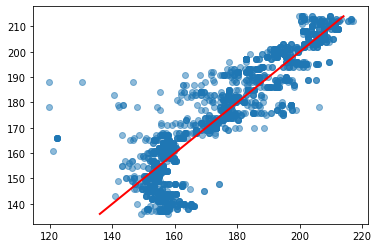

In [43]:
plt.scatter(yp_train, y_train, alpha = 0.5)

plt.plot(y_train,y_train, color = 'red',lw = 2)

In [44]:
yp_test = model.predict(X_test)

In [45]:
mse(y_test,yp_test)

465.92774961500555

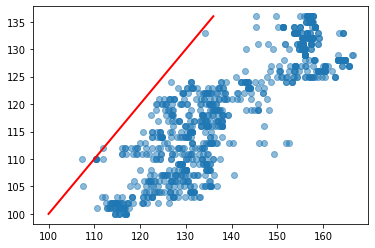

In [46]:
plt.scatter(yp_test, y_test, alpha = 0.5)

plt.plot(y_test,y_test, color = 'red',lw = 2)

In [47]:
mse(y_train, yp_train), mse(yp_test,y_test)

(97.84841276453857, 465.92774961500555)

Text(0.5, 1.0, 'Reservoir Pressure Prediction using current Production Rate')

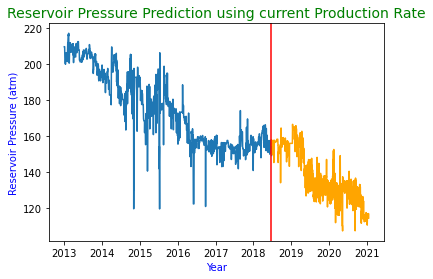

In [70]:
plt.plot(y_train.index,yp_train)
plt.plot(y_test.index,yp_test, c = 'orange')
plt.axvline(y_train.index[-1], c = 'r')

plt.xlabel('Year',color='blue')
plt.ylabel('Reservoir Pressure (atm)', color= 'blue')

plt.title('Reservoir Pressure Prediction using current Production Rate',color = 'green',size = 14)

In [62]:
X_train, X_test, y_train, y_test = df.iloc[:2000,[0,3,5,6]],  df.iloc[2000:,[0,3,5,6]],  df['\nGas volume (m3/day)'][:2000], df['\nGas volume (m3/day)'][2000:]

In [63]:
model1 = LinearRegression()

In [64]:
model1.fit(X_train,y_train)

LinearRegression()

In [65]:
yp1 = model1.predict(X_test)

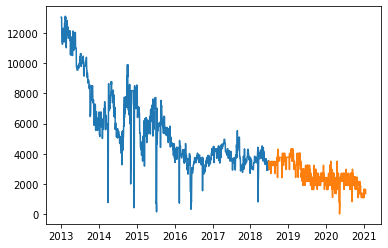

In [68]:
plt.plot(df.index[:2000],y_train)

plt.plot(df.index[2000:],yp1)